In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import cv2
import numpy as np

In [14]:
base_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(base_dir, "data")
train_csv_path = os.path.join(data_dir, 'train_1.csv')
train_images_dir = os.path.join(data_dir, 'train_images')

train_df = pd.read_csv(train_csv_path)
print(train_df.head())

        id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0


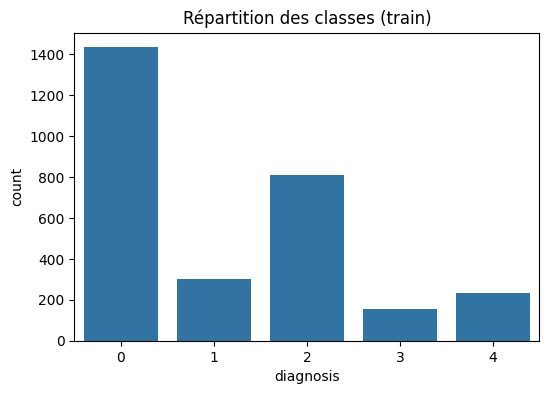

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='diagnosis', order=sorted(train_df['diagnosis'].unique()))
plt.title("Répartition des classes (train)")
plt.show()


In [19]:
import json
with open(os.path.join(base_dir, 'class_weight.json'), 'r') as f:
    class_weight_dict = json.load(f)

class_weight_dict = {int(k): float(v) for k, v in class_weight_dict.items()}

print(class_weight_dict)


{0: 0.4086471408647141, 1: 1.9533333333333334, 2: 0.7252475247524752, 3: 3.8051948051948052, 4: 2.5042735042735043}


In [17]:
class_weight_dict_clean = {int(k): float(v) for k, v in class_weight_dict.items()}

import json
with open(os.path.join(base_dir, 'class_weight.json'), 'w') as f:
    json.dump(class_weight_dict_clean, f, indent=4)

print("Class weights sauvegardés dans class_weight.json")


Class weights sauvegardés dans class_weight.json


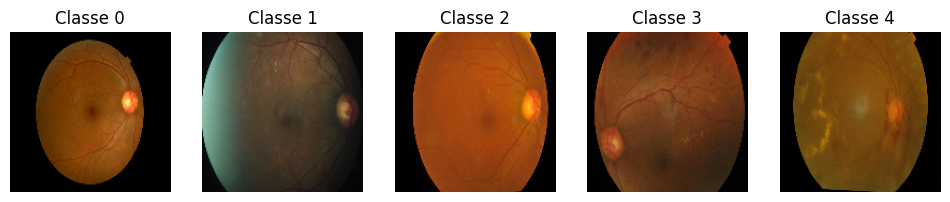

In [18]:
def show_images_per_class(df, images_dir, classes=[0,1,2,3,4], img_size=(150, 150)):
    plt.figure(figsize=(12, 8))
    for i, cls in enumerate(classes):
        img_id = df[df['diagnosis'] == cls].iloc[0]['id_code']
        img_path = os.path.join(images_dir, f"{img_id}.png")
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        
        plt.subplot(1, len(classes), i + 1)
        plt.imshow(img)
        plt.title(f"Classe {cls}")
        plt.axis("off")
    plt.show()

show_images_per_class(train_df, train_images_dir)
